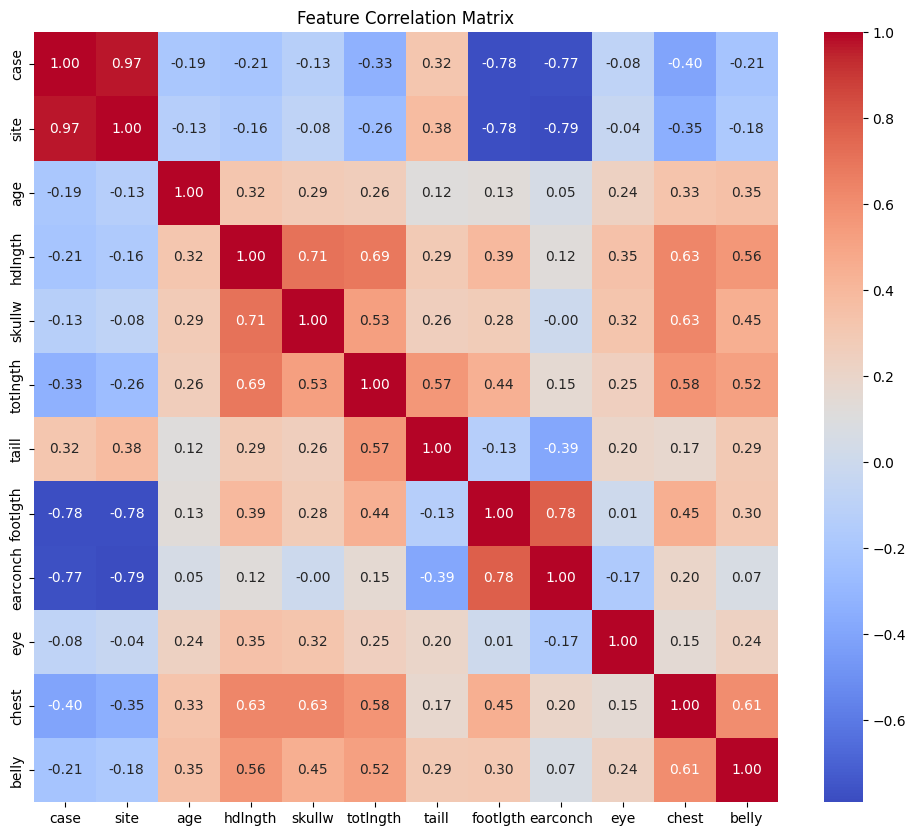

In [6]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# Load dataset
df = pd.read_csv("/Users/tatianagong/Documents/Gong-CMOR-438-Spring-2025/Supervised Learning/2. Linear Regression/possum.csv")
df.head()

# Visualize correlations between features
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.show()

We want to exclude case and site because those are categorical labels. For learning purposes, we will only select two features that have a strong correlation indicated by the heat map for the linear regression model. Let us go with **earconch** and **footlgth**. Next, we will extract the target features and apply the learning model.

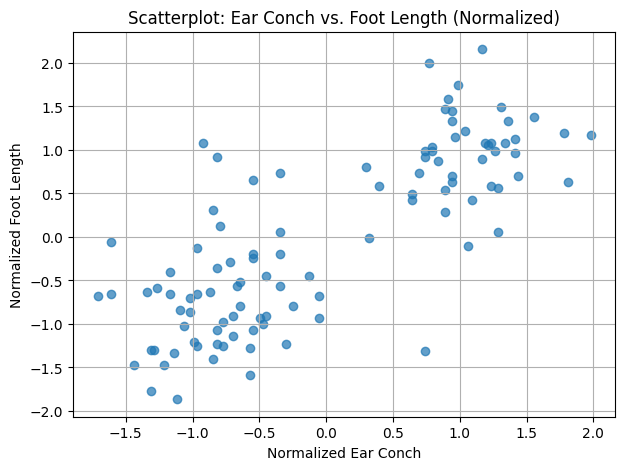

In [ ]:
# Drop rows with missing values in selected features and target
df_clean = df[['earconch', 'footlgth']].dropna()

# Extract features and target
X = df_clean[['earconch']].values
y = df_clean['footlgth'].values

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Put into DataFrame for convenience
df_scaled = pd.DataFrame(X_scaled, columns=['earconch', 'footlgth'])

# Visualize the points
plt.figure(figsize=(7, 5))
plt.scatter(df_scaled['earconch'], df_scaled['footlgth'], alpha=0.7)
plt.xlabel('Normalized Ear Conch')
plt.ylabel('Normalized Foot Length')
plt.title('Scatterplot: Ear Conch vs. Foot Length (Normalized)')
plt.grid(True)
plt.show()


There is somewhat of a positive correlation that can be seen in the data, as indicated y the previous heatmap. In our training of the linear regression model, we want to minimize the cost function [insert pic], which is a function of weights and bias.

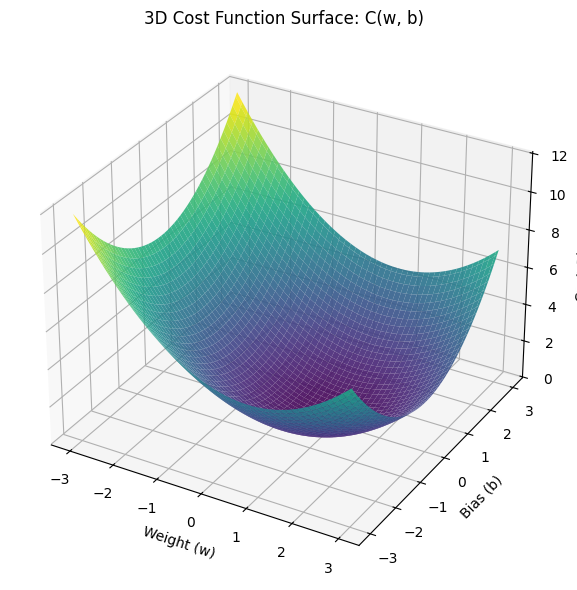

In [10]:
from mpl_toolkits.mplot3d import Axes3D

# Prepare mesh grid for w and b
w_vals = np.linspace(-3, 3, 100)
b_vals = np.linspace(-3, 3, 100)
W, B = np.meshgrid(w_vals, b_vals)

# Evaluate the cost C(w, b) at each point in the grid
Z = np.zeros_like(W)
N = len(X)

for i in range(W.shape[0]):
    for j in range(W.shape[1]):
        y_hat = W[i, j] * X + B[i, j]
        Z[i, j] = (1 / (2 * N)) * np.sum((y_hat - y) ** 2)

# Plot the 3D cost surface
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(W, B, Z, cmap='viridis', edgecolor='none', alpha=0.9)

ax.set_xlabel('Weight (w)')
ax.set_ylabel('Bias (b)')
ax.set_zlabel('Cost C(w, b)')
ax.set_title('3D Cost Function Surface: C(w, b)')
plt.tight_layout()
plt.show()


For conveninence, we will use the LinearRegression class from the scikit learn package. It fits a linear model with coefficients w = (w1, …, wp) to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation. We will first split the data into a training set and a testing set, then using the training set to fit the model.

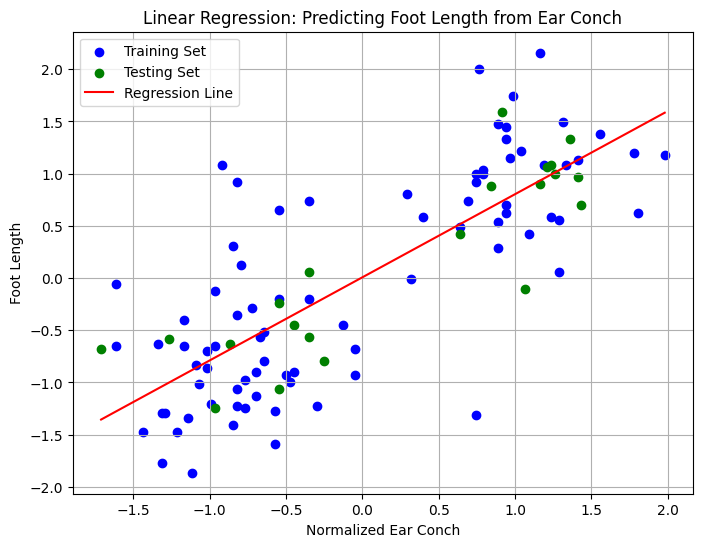

In [22]:
from sklearn.model_selection import train_test_split

# Features and target
X = df_scaled[['earconch']]
y = df_scaled[['footlgth']]

# Split 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)

# Train model on training data
reg = LinearRegression(fit_intercept=True)
reg.fit(X_train, y_train)

# Predict the regression line
x_line = np.linspace(X['earconch'].min(), X['earconch'].max(), 100).reshape(-1, 1)
x_line_df = pd.DataFrame(x_line, columns=['earconch'])
y_line = reg.predict(x_line_df)

# Plot training and testing data with the regression line
plt.figure(figsize=(8, 6))
plt.scatter(X_train, y_train, color='blue', label='Training Set')
plt.scatter(X_test, y_test, color='green', label='Testing Set')
plt.plot(x_line, y_line, color='red', label='Regression Line')
plt.xlabel('Normalized Ear Conch')
plt.ylabel('Foot Length')
plt.title('Linear Regression: Predicting Foot Length from Ear Conch')
plt.legend()
plt.grid(True)
plt.show()


In [24]:
train_score = reg.score(X_train, y_train)
print(f"The R² score of the training data is {train_score:.4f}")
test_score = reg.score(X_test, y_test)
print(f"The R² score of the testing data is {test_score:.4f}")


The R² score of the training data is 0.5861
The R² score of the testing data is 0.7458
